In [1]:
import numpy as np
import pandas as pd 

In [2]:
# avoid user warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../dataset/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [13]:
lr_model = lr.fit(X_train, y_train)

In [14]:
lr.score(X_test, y_test)

0.7395636428390766

In [15]:
Y_pred = lr.predict(X_test)

In [16]:
import matplotlib.pyplot as plt

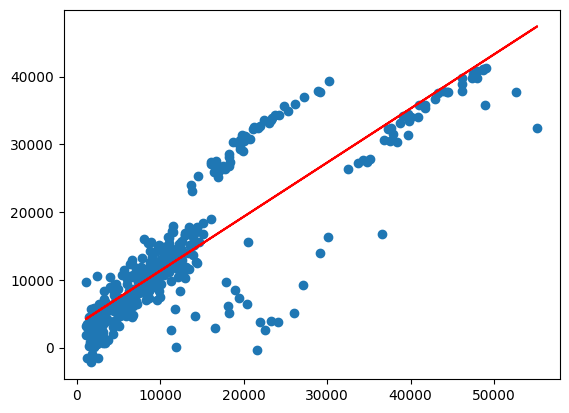

In [17]:
plt.scatter(y_test, Y_pred)
m,b = np.polyfit(y_test,Y_pred,1)
plt.plot(y_test,m*y_test+b,color = 'red')
plt.show()

In [18]:
# create a new test case with the above features
# use valid feature values, use a dictionary with keys as feature names
# and values as feature values

new_test_case= {
    'age': [19],
    'sex': [0],
    'bmi': [27.9],
    'children': [0],
    'smoker': [1],
    'region': [3]
}
new_test_case_df = pd.DataFrame(new_test_case)
new_test_case_df

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3


In [19]:
def predict_charges(features):
    # convert the dictionary into a 2D array
    X = [[features['age'][0], features['sex'][0], features['bmi'][0], features['children'][0], features['smoker'][0], features['region'][0]]]
    prediction = lr.predict(X)
    return prediction[0]



In [20]:
predict_charges(new_test_case)

25214.006738511376

In [21]:
new_test_case= {
    'age': [19],
    'sex': [0],
    'bmi': [27.9],
    'children': [0],
    'smoker': [0],
    'region': [3]
}
new_test_case_df = pd.DataFrame(new_test_case)
predict_charges(new_test_case)

993.0365403111209

It can also be viewed that, if the person smokes the charges are higher, this gives us assurance that the model is indeed working

In [22]:
print("Thus, the model has been trained and predicted successfully")

Thus, the model has been trained and predicted successfully


In [23]:
# export the model using pickle library
import pickle

pickle.dump(lr, open('model.pkl','wb'))

In [24]:
# testin the model by loading it
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[19, 0, 27.9, 0, 1, 3]]))

[25214.00673851]
